# GIS (Geographic Information System or Science)

* 지리공간데이터를 생성/편집/저장/분석/시각화하기 위한 모든 Computer Science

#### Geographic
* 지표상에 있는 모든 지리(地理)적 사상(Feature)

#### Information
* 디지털화된 데이터

#### System / Science
* 지리공간데이터를 처리하기 위한 모든 기법/방법

# GeoPandas

* 지리공간데이터(Geospatial Data)를 처리하기 위한 라이브러리

In [2]:
# 라이브러리 추가하기
import geopandas as gpd

##  Reading data

In [3]:
# 서울시 법정동 .shp파일
_seoul_umd = './maps/LSMD_ADM_SECT_UMD_11/LSMD_ADM_SECT_UMD_11_MOD.shp'

In [4]:
# 지도 파일을 불러와 GeoDataFrame 생성하기
seoul_umd_gdf = gpd.read_file(_seoul_umd)

In [5]:
# 데이터 확인하기
seoul_umd_gdf.head()

,EMD_CD,EMD_NM,SGG_OID,COL_ADM_SE,GID,geometry
0,11620101,봉천동,370,11620,5074,"POLYGON ((126.9666128134386 37.45606662982718,..."
1,11620102,신림동,369,11620,5073,"POLYGON ((126.924155236186 37.48996332682475, ..."
2,11440126,중동,4259,11440,2750,(POLYGON ((126.9005885429364 37.57384854335802...
3,11440120,서교동,2021,11440,2751,(POLYGON ((126.9088210997562 37.55738619899759...
4,11440109,염리동,1714,11440,2752,"POLYGON ((126.943913138613 37.54299547072163, ..."


In [6]:
# Dataframe 개요정보 확인하기
seoul_umd_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 467 entries, 0 to 466
Data columns (total 6 columns):
EMD_CD        467 non-null object
EMD_NM        467 non-null object
SGG_OID       467 non-null int64
COL_ADM_SE    467 non-null object
GID           467 non-null int64
geometry      467 non-null object
dtypes: int64(2), object(4)
memory usage: 22.0+ KB


In [7]:
# Dataframe 통계정보 확인하기
seoul_umd_gdf.describe()

,SGG_OID,GID
count,467.000000,467.000000
mean,515.057816,2867.668094
std,751.570789,244.517680
min,33.000000,2615.000000
25%,146.000000,2733.500000
50%,322.000000,2850.000000
75%,397.500000,2968.500000
max,4259.000000,5074.000000


In [8]:
seoul_umd_gdf.info()
seoul_umd_gdf.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 467 entries, 0 to 466
Data columns (total 6 columns):
EMD_CD        467 non-null object
EMD_NM        467 non-null object
SGG_OID       467 non-null int64
COL_ADM_SE    467 non-null object
GID           467 non-null int64
geometry      467 non-null object
dtypes: int64(2), object(4)
memory usage: 22.0+ KB


,EMD_CD,EMD_NM,SGG_OID,COL_ADM_SE,GID,geometry
0,11620101,봉천동,370,11620,5074,"POLYGON ((126.9666128134386 37.45606662982718,..."
1,11620102,신림동,369,11620,5073,"POLYGON ((126.924155236186 37.48996332682475, ..."
2,11440126,중동,4259,11440,2750,(POLYGON ((126.9005885429364 37.57384854335802...
3,11440120,서교동,2021,11440,2751,(POLYGON ((126.9088210997562 37.55738619899759...
4,11440109,염리동,1714,11440,2752,"POLYGON ((126.943913138613 37.54299547072163, ..."


#### GeoPandas Data Structure(데이터 구조)
##### GeoDataFrame / Series / GeoSeries

In [9]:
print(type(seoul_umd_gdf))
print(type(seoul_umd_gdf['EMD_NM']))
print(type(seoul_umd_gdf['geometry']))

<class 'geopandas.geodataframe.GeoDataFrame'>
<class 'pandas.core.series.Series'>
<class 'geopandas.geoseries.GeoSeries'>


### GeoSeries 알아보기
* Pandas의 Series + Geometry

##### GeoSeries 속성(Attributes)
* geom_type
* area
* bounds
* total_bounds

In [10]:
# geometry type 확인하기
seoul_umd_gdf['geometry'].geom_type[:5]

0         Polygon
1         Polygon
2    MultiPolygon
3    MultiPolygon
4         Polygon
dtype: object

In [11]:
# GeoSeries 면적 계산하기
seoul_umd_gdf['geometry'].area[:5]

0    0.000831
1    0.001847
2    0.000034
3    0.000121
4    0.000054
dtype: float64

In [12]:
# 길이 확인하기
seoul_umd_gdf['geometry'].length[:5]

0    0.165331
1    0.231142
2    0.041604
3    0.064061
4    0.052414
dtype: float64

In [13]:
# 좌표체계 확인하기
seoul_umd_gdf.crs

{'init': 'epsg:4326'}

In [14]:
# GeoSeries bbox가져오기
seoul_umd_gdf['geometry'].bounds[:5]

,minx,miny,maxx,maxy
0,126.924102,37.454990,126.973992,37.495072
1,126.898944,37.435712,126.970569,37.490333
2,126.900589,37.567339,126.916785,37.576001
3,126.908821,37.548325,126.933386,37.558970
4,126.943650,37.541454,126.950558,37.556995


In [15]:
# 지도 전체 bbox가져오기
seoul_umd_gdf['geometry'].total_bounds

array([126.7644839 ,  37.42829722, 127.18379493,  37.70145496])

##### GeoSeries Method
* centroid
* distance()
* representative_point()
* plot()

In [16]:
# 폴리곤 중심점 
seoul_umd_gdf['geometry'].centroid[:5]

0    POINT (126.9534831201879 37.47797051928343)
1    POINT (126.9358086642211 37.46319855393769)
2     POINT (126.9062316549448 37.5716037306557)
3    POINT (126.9187010958127 37.55378211243569)
4    POINT (126.9472741867784 37.54906680257832)
dtype: object

In [17]:
seoul_umd_gdf['geometry'].representative_point()[:5]

0     POINT (126.9570189897206 37.4749913548565)
1    POINT (126.9345648069987 37.46304682385981)
2    POINT (126.9057022371753 37.57156756107864)
3    POINT (126.9203098232254 37.55364694794186)
4    POINT (126.9470769606106 37.54919607747402)
dtype: object

In [18]:
# 두점 거리 계산하기
start_point = seoul_umd_gdf['geometry'].centroid[0]
end_point = seoul_umd_gdf['geometry'].centroid[1]

start_point.distance(end_point)

0.023034698910505698

### GeoDataFrame 알아보기

In [19]:
# !pip3 install descartes

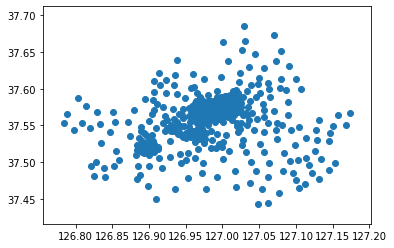

In [27]:
# 지도 시각화
seoul_umd_gdf.plot()

In [21]:
# 현재 위치정보(좌표)가 저장된 GeoSeries명 확인하기
seoul_umd_gdf.geometry.name

'geometry'

In [22]:
# 컬럼명 변경하기
seoul_umd_gdf = seoul_umd_gdf.rename(columns={'geometry': 'geom'})

In [23]:
# GeoDataFrame에 위치정보 등록하기
seoul_umd_gdf = seoul_umd_gdf.set_geometry('geom')
seoul_umd_gdf.geometry.name

'geom'

In [24]:
# GeoDataFrame의 새로운 컬럼에 폴리곤 중심점 값을 할당하기
seoul_umd_gdf['centoroid'] = seoul_umd_gdf.centroid
seoul_umd_gdf.head()

,EMD_CD,EMD_NM,SGG_OID,COL_ADM_SE,GID,geom,centoroid
0,11620101,봉천동,370,11620,5074,"POLYGON ((126.9666128134386 37.45606662982718,...",POINT (126.9534831201879 37.47797051928343)
1,11620102,신림동,369,11620,5073,"POLYGON ((126.924155236186 37.48996332682475, ...",POINT (126.9358086642211 37.46319855393769)
2,11440126,중동,4259,11440,2750,(POLYGON ((126.9005885429364 37.57384854335802...,POINT (126.9062316549448 37.5716037306557)
3,11440120,서교동,2021,11440,2751,(POLYGON ((126.9088210997562 37.55738619899759...,POINT (126.9187010958127 37.55378211243569)
4,11440109,염리동,1714,11440,2752,"POLYGON ((126.943913138613 37.54299547072163, ...",POINT (126.9472741867784 37.54906680257832)


In [25]:
seoul_umd_gdf = seoul_umd_gdf.set_geometry('centoroid')
seoul_umd_gdf.geometry.name

'centoroid'

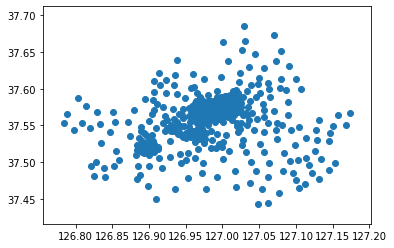

In [26]:
seoul_umd_gdf.plot()

##  Writing data

In [33]:
# 폴더생성
!mkdir ./maps/seoul_umd

In [29]:
# 불필요한 컬럼 제거하기
columns = ['EMD_CD','EMD_NM','COL_ADM_SE','geom']
gdf = gpd.GeoDataFrame(seoul_umd_gdf[columns], geometry='geom')

In [30]:
type(gdf)

geopandas.geodataframe.GeoDataFrame

In [34]:
# shp파일로 저장하기
# seoul_umd_gdf = seoul_umd_gdf.set_geometry('geom')
gdf.to_file('./maps/seoul_umd/seoul_umd.shp')

In [35]:
# geojson으로 저장하기
gdf.to_file('./maps/seoul_umd.geojson', driver='GeoJSON')